### Mettez vos implémentations ci-dessous (Fonctions d'activation / de perte, couche de neurones, réseau)

In [7]:
import numpy as np
import json

### Chargeons les données et observons-les

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])


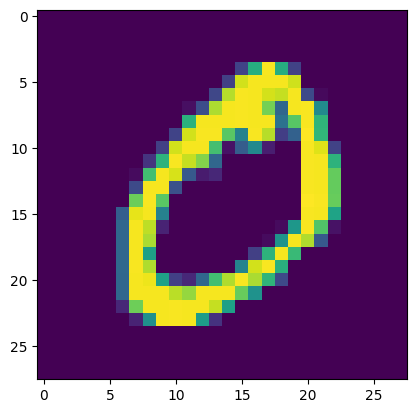

In [2]:
import tensorflow as tf #Librairie de réseau de neurones, pour récupérer le jeu de données
import matplotlib.pyplot as plt
import pprint
mnist = tf.keras.datasets.mnist
train_data, test_data = mnist.load_data()

# Séparation données d'entraînement / de test
train_images, train_labels = train_data
test_images, test_labels = test_data
     
# Préparation des données
X_train = train_images.reshape((60000, 784))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 784))
X_test = X_test.astype('float32') / 255
     
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

pprint.pprint(y_train)
# Regardons à quoi ça ressemble
plt.imshow(train_images[1])
plt.show()

### Créez un réseau et fittez-le sur vos données d'entraînement avant de tester sur vos données de test.

Commencez par prédire les 0 (étiquette = 1 dans la première colonne de y_train) puis prédire tous les nombres. 

Testez plusieurs structures de réseau (différentes tailles (nb de couches + taille des chouches), fonction d'activation ReLu plutôt que sigmoïde). Commentez vos résultats (en parlant de surapprentissage,.

### Créez un réseau et fittez-le sur vos données d'entraînement avant de tester sur vos données de test.

Commencez par prédire les 0 (étiquette = 1 dans la première colonne de y_train) puis prédire tous les nombres. 

Testez plusieurs structures de réseau (différentes tailles (nb de couches + taille des chouches), fonction d'activation ReLu plutôt que sigmoïde). Commentez vos résultats (en parlant de surapprentissage,.

In [20]:
class activation:
    def __init__(self, function, derivative):
        self.function = function
        self.derivative = derivative

sigmoid = activation(lambda x : 1/(1+np.exp(-x)), lambda x : np.exp(-x)/((1+np.exp(-x))**2))

identity = activation(lambda x : x, lambda x : 1)

relu     = activation(lambda x: np.maximum(0, x),
                      lambda x: (x > 0).astype(float))

class layer:
    def __init__(self, size_in, size_out, activation_function):
        self.entry = np.zeros([size_in])
        self.weights = np.random.normal(size=[size_out, size_in])
        self.gradient_weights = np.zeros([size_out, size_in])
        self.bias = np.random.normal(size=[size_out])
        self.gradient_bias = np.zeros([size_out])
        self.activation = activation_function
    
    def output(self):
        return self.activation.function(self.weights @ self.entry + self.bias)
    
    def derivate(self):
        return self.activation.derivative(self.weights @ self.entry + self.bias)
    
    def descend(self, step_length):
        self.weights -= step_length * self.gradient_weights
        self.bias -= step_length * self.gradient_bias
        
        # Reset gradients
        # self.gradient_weights = np.zeros([self.weights.shape[0], self.weights.shape[1]])
        # self.gradient_bias = np.zeros([self.bias.shape[0]])
        self.gradient_weights.fill(0) #MODIF
        self.gradient_bias.fill(0) #MODIF

class network:
    def __init__(self):
        self.layers = []
    
    def save_weights(self, filepath):
        weights_and_biases = []
        for layer in self.layers:
            layer_data = {
                "weights": layer.weights.tolist(),  # Convertir en liste pour JSON
                "bias": layer.bias.tolist()
            }
            weights_and_biases.append(layer_data)
        with open(filepath, 'w') as f:
            json.dump(weights_and_biases, f)
        print(f"Poids sauvegardés dans {filepath}")

    def load_weights(self, filepath):
        with open(filepath, 'r') as f:
            weights_and_biases = json.load(f)
        for layer, layer_data in zip(self.layers, weights_and_biases):
            layer.weights = np.array(layer_data["weights"])  # Convertir en numpy array
            layer.bias = np.array(layer_data["bias"])
        print(f"Poids chargés depuis {filepath}")


    def add_layer(self,size_in, size_out, activation_function):
        new_layer = layer(size_in, size_out, activation_function)
        self.layers.append(new_layer)
        
    def run(self,x):
        output = np.copy(x) #Par défaut, numpy ne fait pas de copies lors des attributions
        for layer in self.layers:
            # layer.entry = np.copy(output)
            # output = np.copy(layer.output())
            layer.entry = output #MODIF
            output = np.copy(layer.output()) #MODIF
        return output
    
    def fit(self,training_data, training_labels, nb_steps, step_length):
        n = training_data.shape[0]
        for i in range(nb_steps):
            loss = 0
            for j in range(n):
                output = self.run(training_data[j,:].transpose())
                H = output - training_labels[j,:] 
                loss += -np.sum(training_labels[j,:] * np.log(output + 1e-12))/n # MODIF
                
                for layer in reversed(self.layers):
                    # temp = layer.derivate()
                    # layer.gradient_weights += np.outer(H * temp, layer.entry)
                    # layer.gradient_bias += H * temp
                    # H = layer.weights.transpose() @ (H * temp)
                    layer.gradient_weights += np.outer(H, layer.entry) #MODIF
                    layer.gradient_bias += H #MODIF
                    H = layer.weights.transpose() @ H #MODIF
                    
            
            for layer in self.layers:
                layer.descend(step_length)
            
            # if(i%10 == 0) : print(loss)
            print(loss)

0.07282032366331256
0.7008771920001512
0.5696441080334016
0.33935560531184283
0.21480330434167055
0.17071126487831295
0.1562107391496514
0.15136584339956827
0.14480875926346634
0.13701737376655374
0.1287661221224124
0.12178039803091643
0.11539989194654438
0.11008462693872235
0.1054183505557301
0.10084631759095164
0.09677797781980832
0.09312642535195782
0.08970190850327152
0.0865215156941274
Poids sauvegardés dans weights_all
Précision: 96.87%


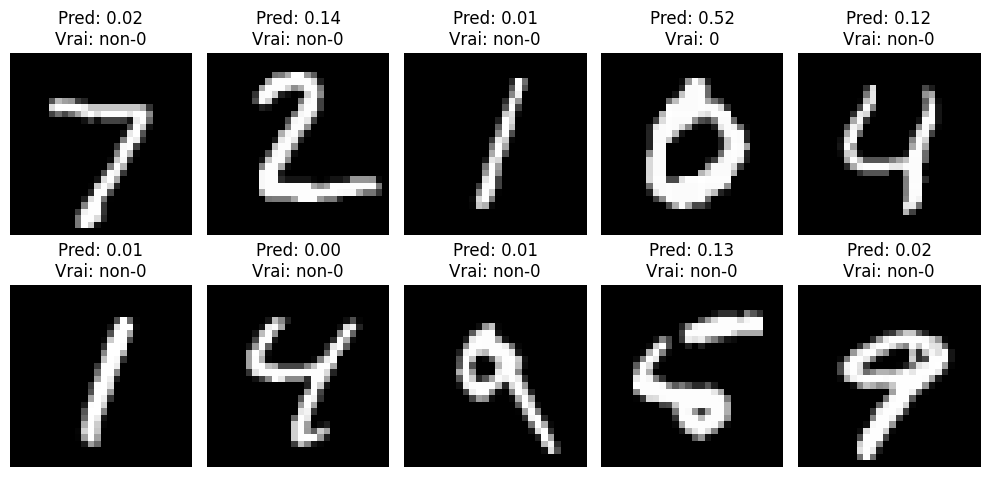

In [ ]:
# Préparation des données pour détecter uniquement les zéros
y_train_zero = y_train[:, 0].reshape(-1, 1)  # Première colonne = zéros
y_test_zero = y_test[:, 0].reshape(-1, 1)


NN = network()
NN.add_layer(784, 20, sigmoid)
NN.add_layer(20, 20, sigmoid)        
NN.add_layer(20, 1, sigmoid)   
# Fonctonne bien pour la détection des zéros  


# NN.fit(X_train, y_train_zero, 200, 0.0001)
NN.fit(X_train, y_train_zero, 20, 10e-6) #MODIF

y_pred = np.zeros(len(X_test))  # Pour stocker les prédictions

# Boucle pour tester chaque image
for j in range(len(X_test)):
    output = NN.run(X_test[j,:]) 
    y_pred[j] = output[0]

# Conversion des prédictions en 0 ou 1
pred_class = np.zeros(len(y_pred))
for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
        pred_class[i] = 1
    else:
        pred_class[i] = 0

# Conversion des vraies valeurs en format plat
true_class = []
for val in y_test_zero:
    true_class.append(val[0])

# Calcul de la précision
correct = 0
for i in range(len(pred_class)):
    if pred_class[i] == true_class[i]:
        correct += 1
accuracy = correct / len(pred_class) * 100



print(f"Précision: {accuracy:.2f}%")

# Affichage de quelques exemples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i], cmap='gray')
    if true_class[i] == 1:
        vraie_valeur = "0"
    else:
        vraie_valeur = "non-0"
    plt.title(f"Pred: {y_pred[i]:.2f}\nVrai: {vraie_valeur}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Début de l'entraînement pour tous les chiffres...
Entraînement terminé!
Poids chargés depuis weights_all.json
Test du modèle...
Précision sur tous les chiffres: 77.00%


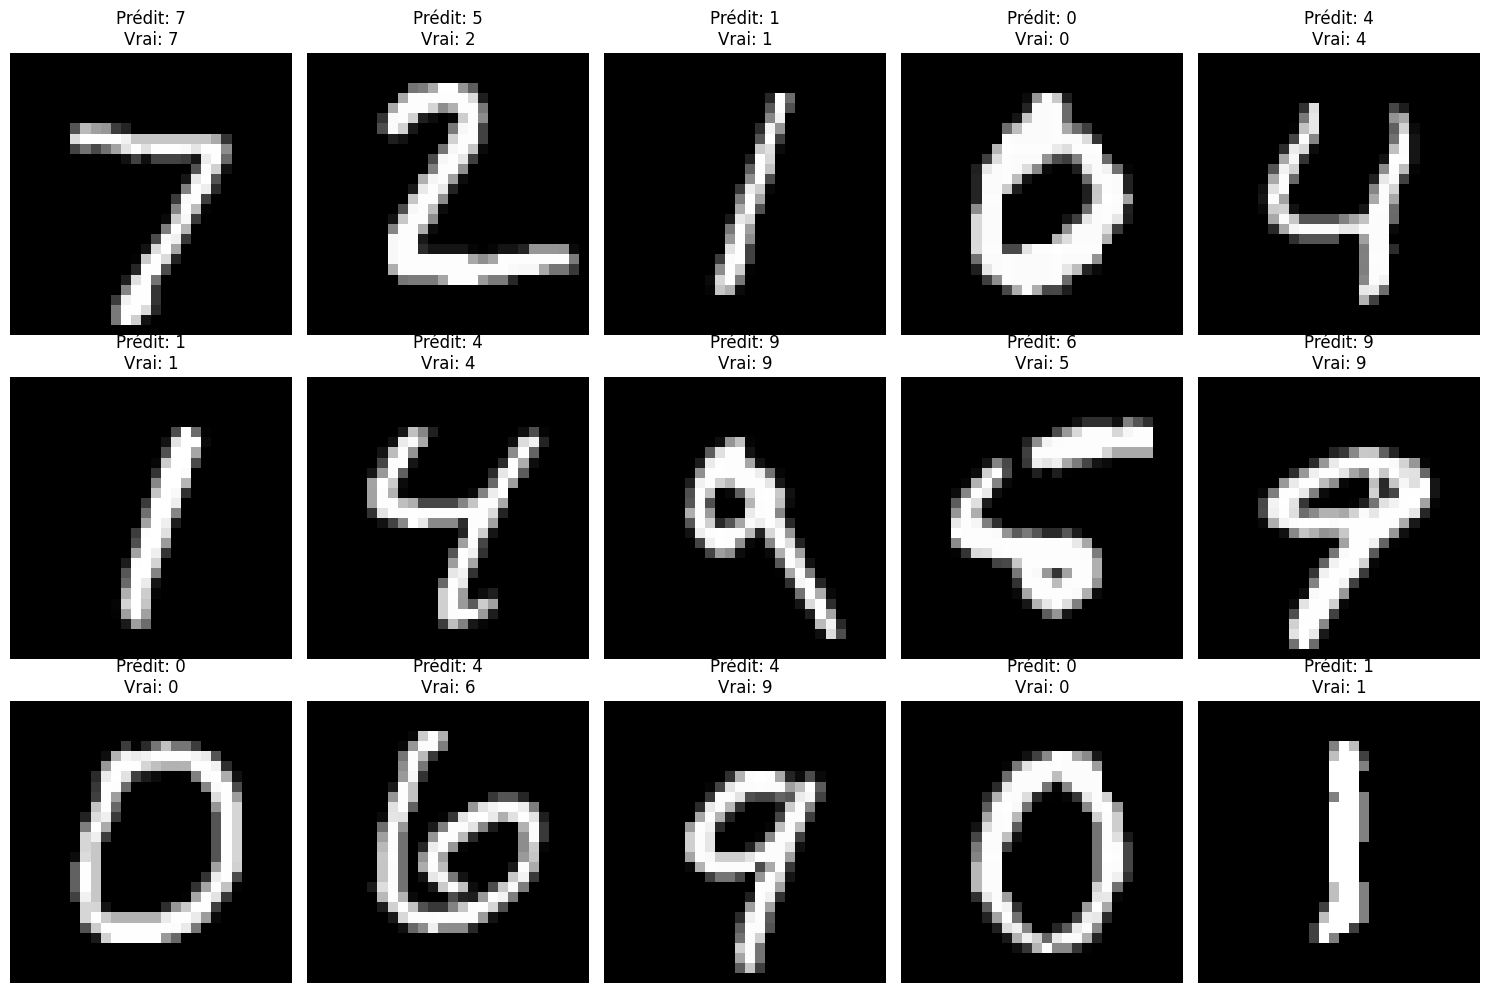

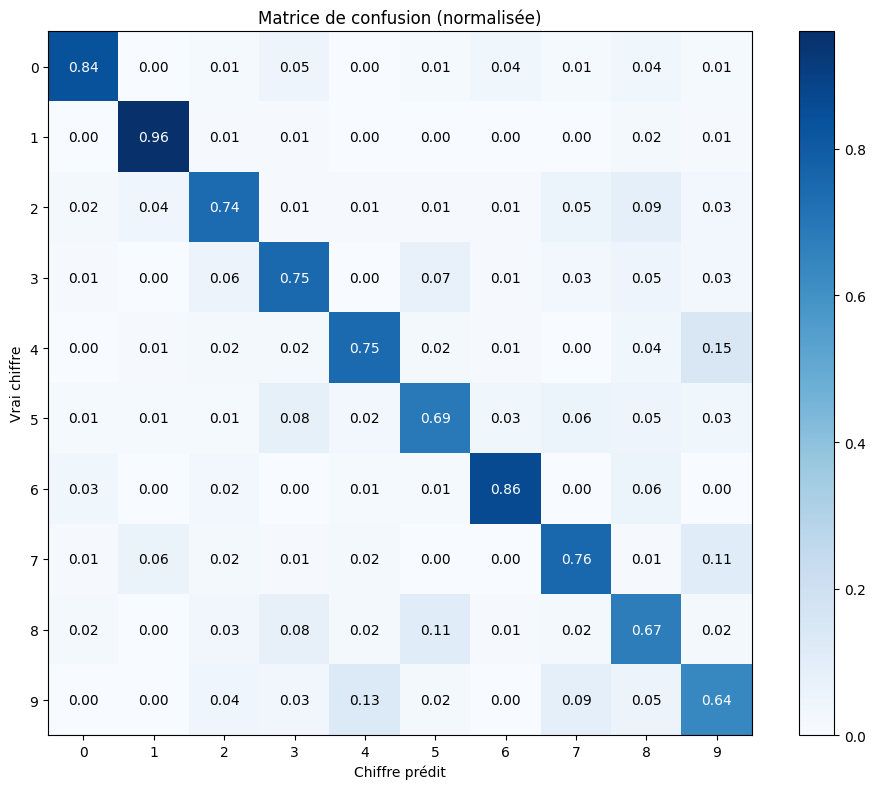

In [26]:
# Création d'un réseau pour détecter tous les chiffres (0-9)
NN_all = network()
NN_all.add_layer(784, 100, sigmoid)    # Première couche plus grande
NN_all.add_layer(100, 50, relu)     # Deuxième couche cachée
NN_all.add_layer(50, 10, sigmoid)      # Couche de sortie avec 10 neurones (un par chiffre)

# Utiliser les étiquettes one-hot complètes (10 classes)
print("Début de l'entraînement pour tous les chiffres...")
# Utiliser les labels originaux (one-hot) avec 10 classes
# NN_all.fit(X_train, y_train, 120, 0.00001)  # Même nombre d'itérations et taux d'apprentissage


#NN_all.fit(X_train, y_train, 100, 10e-7)  # MODIF

print("Entraînement terminé!")

#NN.save_weights("weights.json")
# Test sur les images de test
n_test = 1000  # Réduire pour accélérer les tests si nécessaire
y_pred_all = np.zeros((n_test, 10))  # Pour stocker les prédictions (10 chiffres)

NN_all.load_weights("weights_all.json")

# Boucle pour tester chaque image
print("Test du modèle...")
for j in range(n_test):
    output = NN_all.run(X_test[j,:])  # Passe l'image dans le réseau
    y_pred_all[j] = output  # Récupère les 10 probabilités

# Conversion des prédictions en chiffre prédit
pred_digits = np.zeros(n_test)
for i in range(n_test):
    # Le chiffre prédit est celui avec la plus haute probabilité
    pred_digits[i] = np.argmax(y_pred_all[i])

# Récupération des vrais chiffres
true_digits = test_labels[:n_test]  # Les vrais chiffres (0-9)

# Calcul de la précision
correct = 0
for i in range(n_test):
    if pred_digits[i] == true_digits[i]:
        correct += 1
accuracy = correct / n_test * 100

print(f"Précision sur tous les chiffres: {accuracy:.2f}%")

# Affichage de quelques exemples
plt.figure(figsize=(15, 10))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(test_images[i], cmap='gray')
    
    # Afficher le chiffre prédit et le vrai chiffre
    plt.title(f"Prédit: {int(pred_digits[i])}\nVrai: {true_digits[i]}")
    
    # Afficher aussi les probabilités pour chaque chiffre
    probs = y_pred_all[i]
    plt.xlabel(f"Prob: {probs[int(pred_digits[i])]:.2f}")
    
    plt.axis('off')
plt.tight_layout()
plt.show()

# Matrice de confusion pour voir les erreurs courantes
confusion = np.zeros((10, 10))
for i in range(n_test):
    pred_digit = int(pred_digits[i])
    true_digit = int(true_digits[i])
    confusion[true_digit, pred_digit] += 1

# Normaliser la matrice de confusion par ligne
# pour voir quels chiffres sont confondus en pourcentage
for i in range(10):
    if np.sum(confusion[i]) > 0:  # Éviter la division par zéro
        confusion[i] = confusion[i] / np.sum(confusion[i])


plt.figure(figsize=(10, 8))
plt.imshow(confusion, cmap='Blues')
plt.colorbar()
plt.xlabel('Chiffre prédit')
plt.ylabel('Vrai chiffre')
plt.title('Matrice de confusion (normalisée)')
plt.xticks(range(10))
plt.yticks(range(10))

# Afficher les valeurs dans la matrice
for i in range(10):
    for j in range(10):
        color = "white" if confusion[i, j] > 0.5 else "black"
        plt.text(j, i, f"{confusion[i, j]:.2f}", ha='center', va='center', color=color)

plt.tight_layout()
plt.show()

In [23]:
NN_all.save_weights("weights_all.json")

Poids sauvegardés dans weights_all.json
